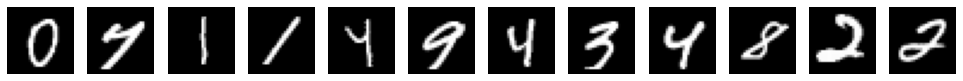

In [18]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]
fig, axs = plt.subplots(1,12, figsize=(17,6))
for i in range(12):
   axs[i].imshow(x_train[i+1000], cmap = plt.get_cmap('gray'))
   axs[i].axis('off')

In [17]:
y_train[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

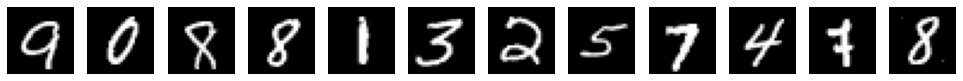

In [7]:

fig, axs = plt.subplots(1,12, figsize=(17,6))
for i in range(12):
   axs[i].imshow(x_train[i+3000], cmap = plt.get_cmap('gray'))
   axs[i].axis('off')

In [10]:
print(x_train.shape[0])

60000


In [8]:
from keras.models import Sequential
from keras.layers import Dense
image_height = x_train.shape[1]
image_width = x_train.shape[2]

model = Sequential()
model.add(Dense(500,input_dim=image_height*image_width,activation='relu'))
model.add(Dense(10,  activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
print(x_train.shape)

(60000, 28, 28)


In [24]:
x_train_r = x_train.reshape(x_train.shape[0], image_height*image_width)
x_test_r = x_test.reshape(x_test.shape[0], image_height*image_width)
x_train_r.shape

(60000, 784)

In [30]:
print(y_train.shape)
y_train_r=np_utils.to_categorical(y_train)
y_test_r=np_utils.to_categorical(y_test)
print(y_train_r.shape)

(60000,)
(60000, 10)


In [27]:
EPOCHS = 50
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train_r, y_train_r, validation_data=(x_test_r, y_test_r), epochs=EPOCHS, batch_size=256, verbose=1)

Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.0906 - accuracy: 0.9957 - val_loss: 1.3186 - val_accuracy: 0.9759
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0857 - accuracy: 0.9956 - val_loss: 1.4480 - val_accuracy: 0.9765
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0808 - accuracy: 0.9960 - val_loss: 1.5243 - val_accuracy: 0.9766
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1079 - accuracy: 0.9955 - val_loss: 1.5951 - val_accuracy: 0.9747
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0695 - accuracy: 0.9966 - val_loss: 1.3974 - val_accuracy: 0.9774
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0624 - accuracy: 0.9969 - val_loss: 1.4523 - val_accuracy: 0.9773
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0932 - accuracy: 0.9957 - val_loss: 1.5615 - val_accuracy: 0.9745

In [41]:
import pandas as pd
df = pd.DataFrame(history.history)
history.history.keys()
df

,loss,accuracy,val_loss,val_accuracy
0,0.090606,0.995717,1.318574,0.9759
1,0.085729,0.995650,1.447964,0.9765
2,0.080780,0.995967,1.524280,0.9766
3,0.107913,0.995467,1.595127,0.9747
4,0.069496,0.996617,1.397430,0.9774
5,0.062417,0.996867,1.452332,0.9773
6,0.093156,0.995683,1.561522,0.9745
7,0.078536,0.996517,1.683014,0.9763
8,0.083492,0.996517,1.580045,0.9780
9,0.086672,0.996483,1.494904,0.9769


In [43]:
df.reset_index().keys()

Index(['index', 'loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [45]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df.index, y=df.val_loss,
                    mode='lines',
                    name='val_loss'))
fig.add_trace(go.Scatter(x=df.index, y=df.loss,
                    mode='lines',
                    name='loss'))

fig.show()

In [47]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df.index, y=df.val_accuracy,
                    mode='lines',
                    name='val_accuracy'))
fig.add_trace(go.Scatter(x=df.index, y=df.accuracy,
                    mode='lines',
                    name='accuracy'))

fig.show()